In [1]:
import walk
from experiment import MultipleExperiment
import tests
import fitter
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def wf(n):
    return 1 + 1/((n+1)**0.5)

test2 = MultipleExperiment(walk.SelfInteractingRandomWalk, n_trials=10000, length=1000, chunk_size=10, weight_function=wf)
test2.run()

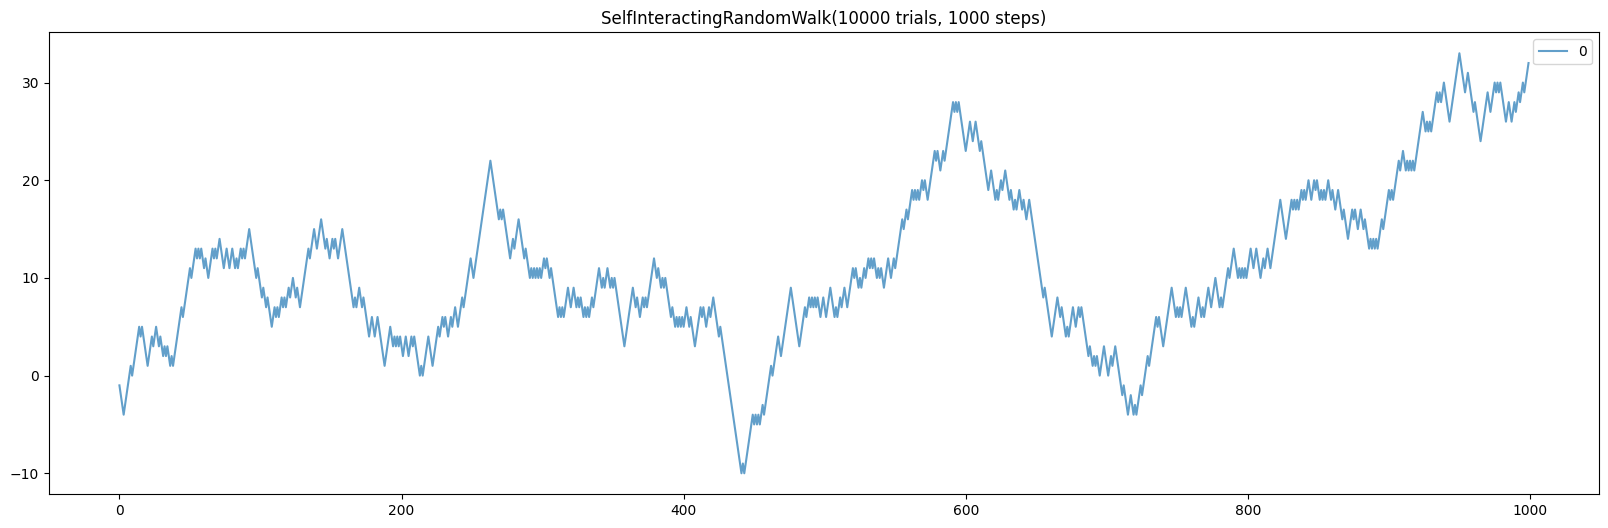

In [10]:
test2.plot([0])

[0.41374336]
`ftol` termination condition is satisfied.


Text(0.5, 1.0, 'SelfInteractingRandomWalk, w(n) = 1+1/(n+1), beta distribution fitting')

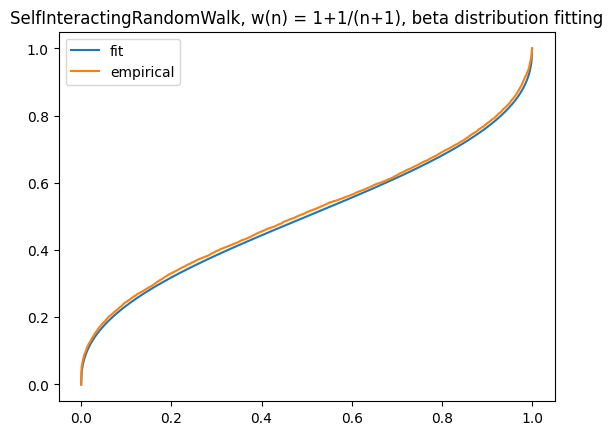

In [11]:
f2 = fitter.BetaFitter(test2.stats['ta0'])
f2.fit([0.15], 'trf')
# f2.plot(100)
# plt.plot(f2.x, f2.func_beta(f2.x, .346574),label = '.346574')
plt.plot(f2.x, f2.func_beta(f2.x, *f2.params), label='fit')
plt.plot(f2.x, f2.y, label = 'empirical')
plt.legend()
plt.title('SelfInteractingRandomWalk, w(n) = 1+1/(n+1), beta distribution fitting')

In [4]:
df = pd.DataFrame(f2.y)
df.head()

,0
0,0.0000
1,0.0266
2,0.0296
3,0.0339
4,0.0369


In [5]:
df.index = f2.x
df.head()

,0
0.0000,0.0000
0.0001,0.0266
0.0002,0.0296
0.0003,0.0339
0.0004,0.0369


In [8]:
df.to_csv('1+w^-110k10k')